# ORF307 Homework 2 {-}
Due: Friday, Feburary 11, 2022 9:00 pm ET

- The jupyter file is available at https://github.com/ORF307/companion
- Please export your code with output as `pdf`.
- If there is any additional answers, please combine them as **ONE** pdf file before submitting to the Gradescope.

# Q1 Least angle property and orthogonality principle of least squares  {-}

Suppose the $m\times n$ matrix $A$ has linearly independent columns, and $b$ is an $m$-vector. Let $x^\star$ denote the least squares approximate solution of $Ax = b$, i.e., $A^TAx^\star = A^Tb$.

(a) Show that for any $n$-vector $x$, $(Ax)^{T} b = (Ax)^{T} (Ax^\star)$, i.e., the inner product of $Ax$
and $b$ is the same as the inner product of $Ax$ and $Ax^\star$.

*Hint.* Use $(Ax)^T b = x^T (A^T b)$.

(b) Show that when $Ax^\star$ and $b$ are both nonzero, we have
$$
\frac{(Ax^\star)^T b}{\|Ax^\star\|_2\|b\|_2}
= \frac{\|Ax^\star\|_2}{\|b\|_2}.
$$
The left-hand side is the cosine of the angle between $Ax^\star$ and $b$. 

*Hint*. Apply part (a) with $x = x^\star$.

(c) *Least angle property of least squares.* Show that $x = x^\star$ also minimizes the angle between $Ax$ and $b$.
(You can assume that $Ax$ and $b$ are nonzero.) 

*Remark*. For any positive scalar $\alpha$, $x = \alpha x^\star$ also minimizes the angle between $Ax$ and $b$.

(d) *Orthogonality principle.* The optimal residual $r$ is defined as $r = Ax^\star-b$. Show that $r$ is orthogonal to the columns of $A$, and therefore, it is orthogonal to any linear combination of the columns of $A$. In other words, for any $n$-vector $z$, we have $(Az)^Tr=0$.

*Remark.* This is one of the most important properties of least squares solutions: $Ax^\star$ is the linear combination of the columns of $A$ that is closest to $b$ and, it is orthogonal to the residual vector $r = Ax^\star - b$. In other words, $Ax^\star$ is the "projection" of $b$ on the space of linear combinations of the columns of $A$.

# Q2 Matrix inversion lemma  {-}

(a) It is sometimes very cheap to solve subsequent linear systems when the coefficient matrix gets slightly modified. Suppose we have a $n \times n$ matrix $M$. Given $n$-vectors $u$ and $v$, prove that, if $v^T M^{-1}u \neq -1$, the following update, called *matrix inversion lemma* holds:
$$
(M + u v^T)^{-1} = M^{-1} - \frac{1}{1 + v^T M^{-1}u}M^{-1}uv^TM^{-1}.
$$

*Hint.* Directly apply the matrix inverse definition, i.e., $(M + u v^T)^{-1}(M + u v^T) = I$.

*Remark.* The assumption $v^T M^{-1}u \neq -1$ can be shown to correspond to $M + uv^T$ being invertible.

(b) Suppose now that $M$ is symmetric positive definite and that you have already computed a Cholesky decomposition $LL^T$ (therefore, we have a convenient way to solve $Mx = b$), but that we want to solve the linear system
$$
(M + u v^T)x = b.
$$
Explain how we can use the recursion in point (a) to do so by solving a few prefactored linear systems.

*Hint.* Remember, we never compute inverses explicitly! Every time you have $M^{-1}q$ for some vector $n$-vector $q$, it means solving the linear system $Mz = q$ with $n$-vector $z$.

(c) Work out the total flop count for this method keeping only the dominant terms and compare it to factoring matrix $M + u v^T$ from scratch.


# Q3 Moore's  Law {-}

In [2]:
# Import required packages for coding exercises
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import cholesky as llt
seed = 1
np.random.seed(seed) # We use np.random.seed for reproducible results

For convenience we have included the following function `lstsq` that solves the least squares problem as we have seen in class returning `x` and factorization `L`.

In [3]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

def lstsq(A, b):
    M = A.T.dot(A)  # Form Gram matrix
    q = A.T.dot(b)  # Form right hand side
    L = llt(M)      # Factor
    x = forward_substitution(L, q)
    x = backward_substitution(L.T, x)
    return x, L

The figure and table below show the number of transistors $N$ in $13$ microprocessors, and the year of their introduction.

In [1]:
# Data
t = np.array([1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003])
N = np.array([2250, 2500, 5000, 29000, 120000, 275000, 1180000, 3100000, 7500000, 24000000, 42000000, \
              220000000, 410000000])

# Show data as dataframe
# NB. Jupyter makes a nice table out of a pandas dataframe
pd.DataFrame({'t': t, 
              'N': N})

,t,N
0,1971,2250
1,1972,2500
2,1974,5000
3,1978,29000
4,1982,120000
5,1985,275000
6,1989,1180000
7,1993,3100000
8,1997,7500000
9,1999,24000000


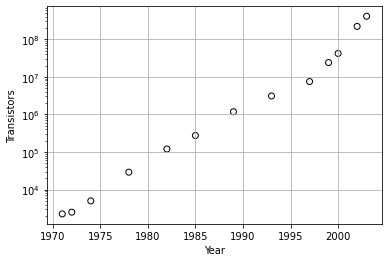

In [2]:
fig, ax = plt.subplots(1,1)
ax.scatter(t, N, marker='o', color='k', facecolors='none')
ax.set_xlabel(r'Year')
ax.set_ylabel(r'Transistors')
ax.set_yscale('log')
ax.grid('on')

The plot gives the number of transistors on a logarithmic scale. Find the least squares
straight-line fit of the data using the model
$$
\log_{10} N \approx \theta_1 + \theta_2(t - 1970),
$$
where $t$ is the year and $N$ is the number of transistors. Note that $\theta_1$ is the model's
prediction of the $\log$ of the number of transistors in 1970, and $10^{\theta_2}$ gives the model's
prediction of the fractional increase in number of transistors per year.



(a) Find the coefficients $\theta_1$ and $\theta_2$ that minimize the mean square error on the data using the `lstsq` function above. Give
the mean square error on the data. Plot the model you find along with the data points.

(b) The first point-contact transistor was invented in 1947. Now let $N=1$, where $\log_{10}N=0$, and then find $t$. See if your model fits the historical data well.

(c) Use your model to predict the number of transistors in a microprocessor introduced
in 2015. Compare the prediction to the IBM Z13 microprocessor, released in 2015, which has around $4\times 10^9$ transistors.

(d) Compare your result with Moore's law, which states that the number of transistors per integrated circuit roughly doubles every one and a half to two years.